In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import os

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
df= pd.read_csv('/content/drive/MyDrive/PDS_Assignment-1/q2/Raw_Data/StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [73]:
#Optional: If you want to remove spaces or replace them with underscores within column names
df.columns = df.columns.str.replace(' ', '_')


# Display the cleaned column names
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [74]:
df.to_csv('/content/drive/MyDrive/PDS_Assignment-1/q2/Clean_Data/CleanedStudentsPerformance.csv')

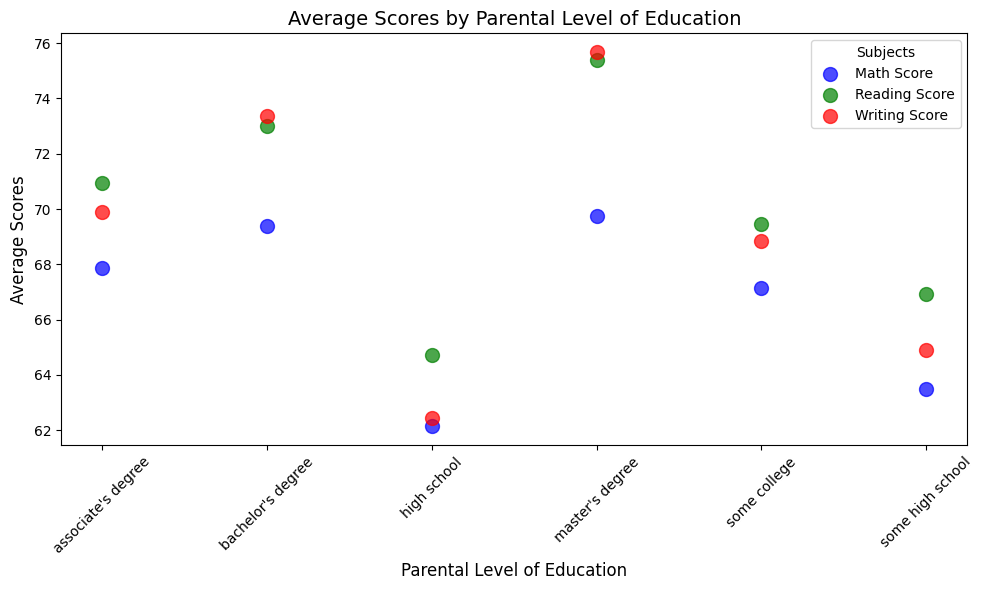

In [75]:
# Group by parental level of education and calculate the mean scores
parental_scores_df = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for each subject
plt.scatter(parental_scores_df['parental_level_of_education'], parental_scores_df['math_score'], color='blue', label='Math Score', s=100, alpha=0.7)
plt.scatter(parental_scores_df['parental_level_of_education'], parental_scores_df['reading_score'], color='green', label='Reading Score', s=100, alpha=0.7)
plt.scatter(parental_scores_df['parental_level_of_education'], parental_scores_df['writing_score'], color='red', label='Writing Score', s=100, alpha=0.7)

# Adding titles and labels
plt.title('Average Scores by Parental Level of Education', fontsize=14)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Average Scores', fontsize=12)
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Subjects')

# Show the plot
plt.tight_layout()
plt.show()


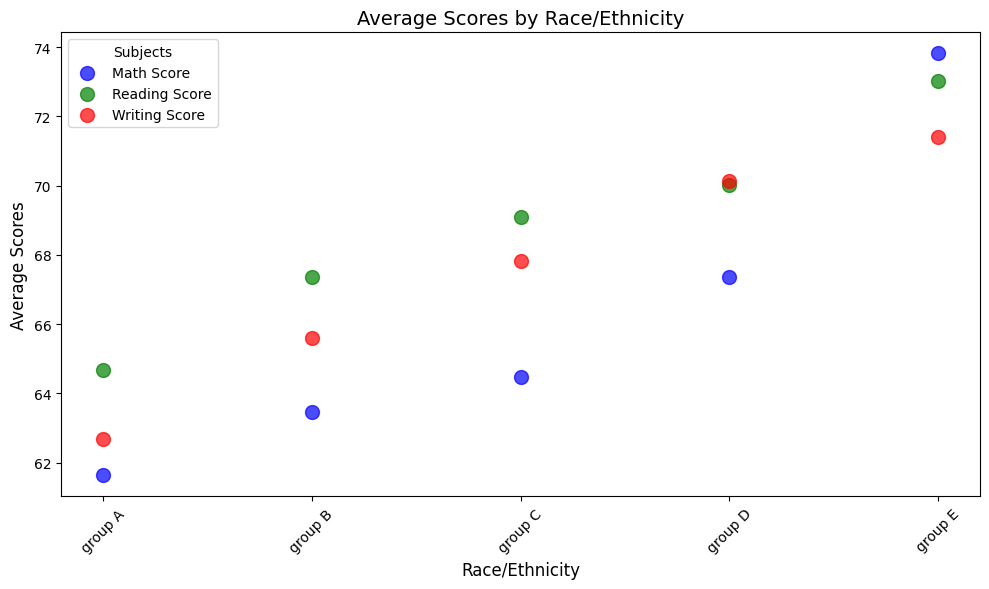

In [76]:
race_scores_df = df.groupby('race/ethnicity')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for each subject
plt.scatter(race_scores_df['race/ethnicity'], race_scores_df['math_score'], color='blue', label='Math Score', s=100, alpha=0.7)
plt.scatter(race_scores_df['race/ethnicity'], race_scores_df['reading_score'], color='green', label='Reading Score', s=100, alpha=0.7)
plt.scatter(race_scores_df['race/ethnicity'], race_scores_df['writing_score'], color='red', label='Writing Score', s=100, alpha=0.7)

# Adding titles and labels
plt.title('Average Scores by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Average Scores', fontsize=12)
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Subjects')

# Show the plot
plt.tight_layout()
plt.show()
save_path = os.path.join('/content/drive/MyDrive/PDS_Assignment-1/q2/Result', "avgscore_vs_Race.png")
fig.savefig(save_path)

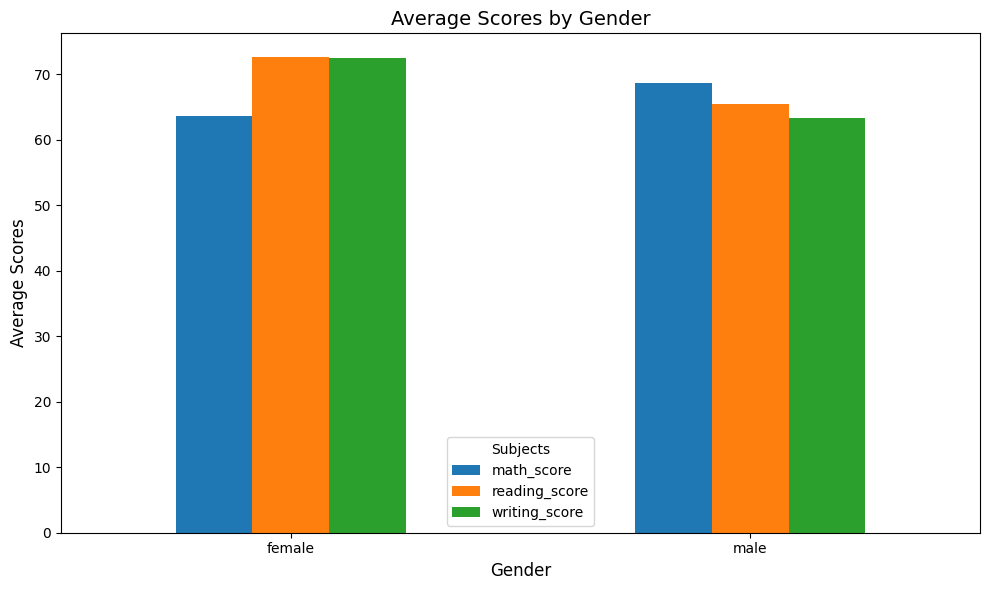

In [77]:
gender_scores_df = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

# Plotting the average scores for each gender group
gender_scores_df.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Average Scores by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Scores', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Subjects')

# Show the plot
plt.tight_layout()
plt.show()
save_path = os.path.join('/content/drive/MyDrive/PDS_Assignment-1/q2/Result', "avgscore_vs_Gender.png")
fig.savefig(save_path)

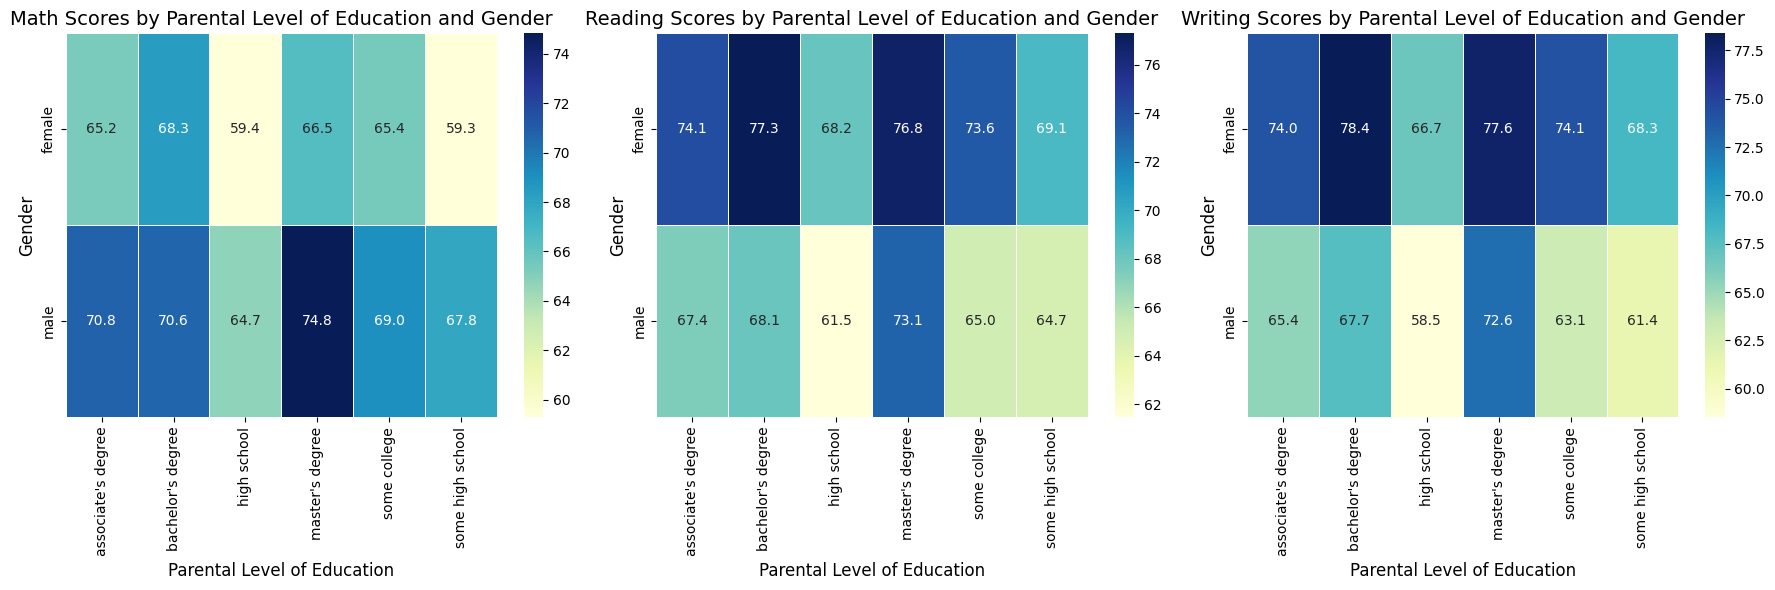

In [78]:
heatmap_data = df.groupby(['parental_level_of_education', 'gender'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Create a pivot table for each score
math_scores_pivot = heatmap_data.pivot(index='gender', columns='parental_level_of_education', values='math_score')
reading_scores_pivot = heatmap_data.pivot(index='gender', columns='parental_level_of_education', values='reading_score')
writing_scores_pivot = heatmap_data.pivot(index='gender', columns='parental_level_of_education', values='writing_score')

# Create a combined figure for the heatmap
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create heatmap for Math scores
sns.heatmap(math_scores_pivot, annot=True, cmap="YlGnBu", fmt=".1f", ax=axs[0], linewidths=.5)
axs[0].set_title('Math Scores by Parental Level of Education and Gender', fontsize=14)
axs[0].set_xlabel('Parental Level of Education', fontsize=12)
axs[0].set_ylabel('Gender', fontsize=12)

# Create heatmap for Reading scores
sns.heatmap(reading_scores_pivot, annot=True, cmap="YlGnBu", fmt=".1f", ax=axs[1], linewidths=.5)
axs[1].set_title('Reading Scores by Parental Level of Education and Gender', fontsize=14)
axs[1].set_xlabel('Parental Level of Education', fontsize=12)
axs[1].set_ylabel('Gender', fontsize=12)

# Create heatmap for Writing scores
sns.heatmap(writing_scores_pivot, annot=True, cmap="YlGnBu", fmt=".1f", ax=axs[2], linewidths=.5)
axs[2].set_title('Writing Scores by Parental Level of Education and Gender', fontsize=14)
axs[2].set_xlabel('Parental Level of Education', fontsize=12)
axs[2].set_ylabel('Gender', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()
save_path = os.path.join('/content/drive/MyDrive/PDS_Assignment-1/q2/Result', "Heatmap.png")
fig.savefig(save_path)

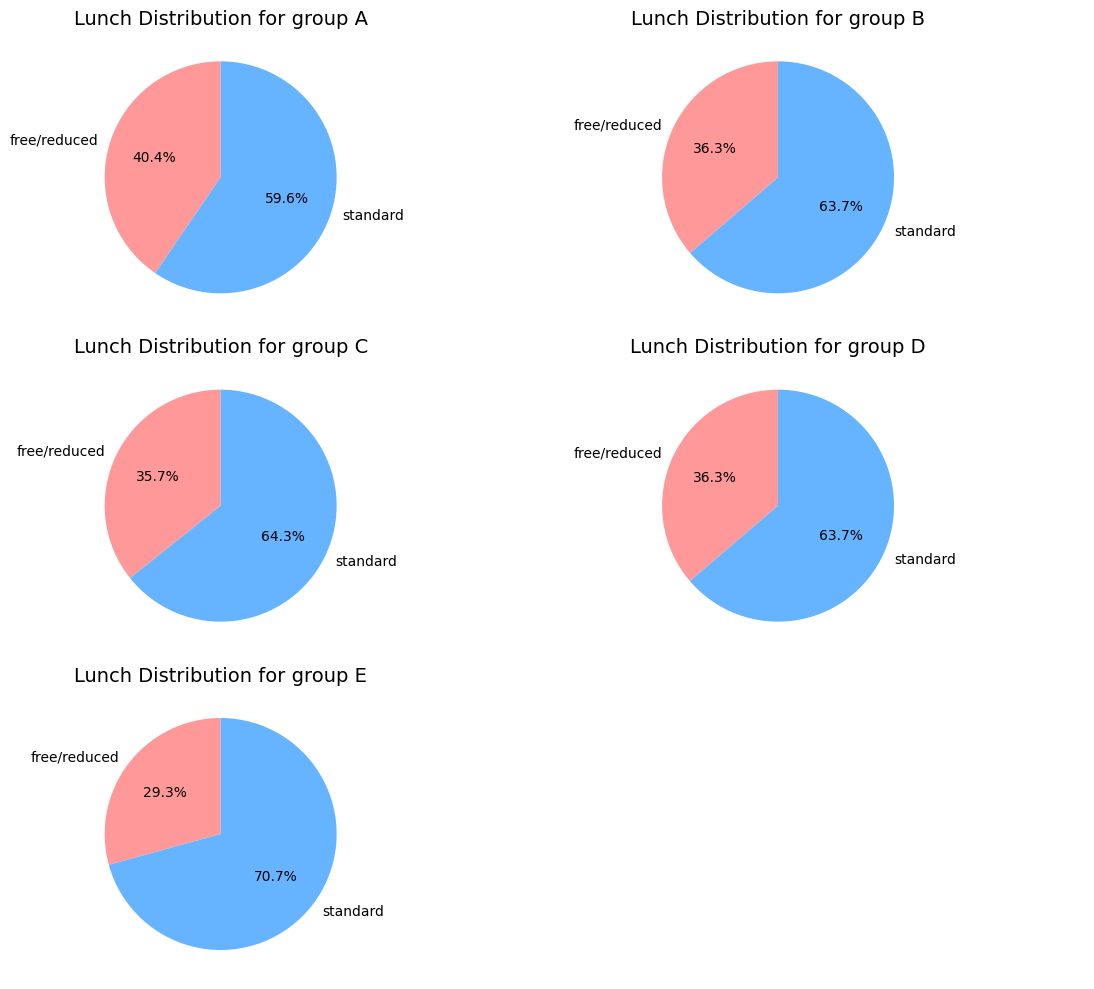

In [79]:
lunch_race_counts = df.groupby(['race/ethnicity', 'lunch']).size().unstack()

# Get the number of unique race/ethnicity categories
num_race_categories = len(lunch_race_counts)

# Create the necessary number of subplots based on unique race/ethnicity categories
fig, axs = plt.subplots((num_race_categories + 1) // 2, 2, figsize=(12, 10))  # Adjust grid size dynamically
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each race/ethnicity and create a pie chart
for i, (race, counts) in enumerate(lunch_race_counts.iterrows()):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    axs[i].set_title(f'Lunch Distribution for {race}', fontsize=14)

# Hide any extra empty subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


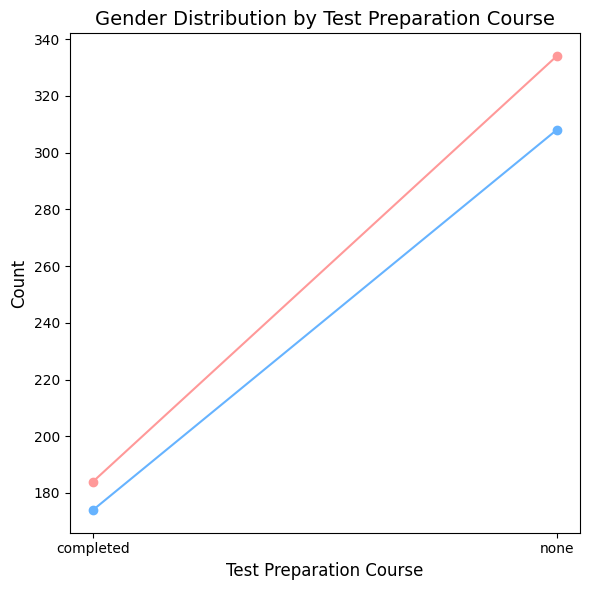

In [80]:
pivot_df = df.pivot_table(index='test_preparation_course', columns='gender', aggfunc='size')

# Plot the line graph
plt.figure(figsize=(6, 6))
plt.plot(pivot_df.index, pivot_df['female'], marker='o', linestyle='-', label='Female', color='#ff9999')
plt.plot(pivot_df.index, pivot_df['male'], marker='o', linestyle='-', label='Male', color='#66b3ff')

# Adding titles and labels
plt.title('Gender Distribution by Test Preparation Course', fontsize=14)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
save_path = os.path.join('/content/drive/MyDrive/PDS_Assignment-1/q2/Result', "Gender_vs_Test.png")
fig.savefig(save_path)